# Task 1 - EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn-talk')
from scipy.stats import multivariate_normal
import tqdm

In [2]:
dftrain = pd.read_csv('ee-train.csv')
dftest = pd.read_csv('ee-test.csv')

In [3]:
dftrain.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.62,808.5,367.5,220.5,3.5,3,0.10,5,12.74
1,0.90,563.5,318.5,122.5,7.0,3,0.10,2,29.68
2,0.90,563.5,318.5,122.5,7.0,3,0.40,2,36.57
3,0.79,637.0,343.0,147.0,7.0,2,0.25,2,38.57
4,0.90,563.5,318.5,122.5,7.0,4,0.40,5,34.72


In [4]:
pd.DataFrame(dftrain.nunique(),columns=['Unique Values']).to_csv('figures\\nunique.csv')

In [5]:
dftrain

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.62,808.5,367.5,220.5,3.5,3,0.10,5,12.74
1,0.90,563.5,318.5,122.5,7.0,3,0.10,2,29.68
2,0.90,563.5,318.5,122.5,7.0,3,0.40,2,36.57
3,0.79,637.0,343.0,147.0,7.0,2,0.25,2,38.57
4,0.90,563.5,318.5,122.5,7.0,4,0.40,5,34.72
...,...,...,...,...,...,...,...,...,...
379,0.62,808.5,367.5,220.5,3.5,4,0.40,1,17.14
380,0.64,784.0,343.0,220.5,3.5,5,0.25,2,17.11
381,0.62,808.5,367.5,220.5,3.5,5,0.10,3,12.73
382,0.71,710.5,269.5,220.5,3.5,4,0.25,3,12.10


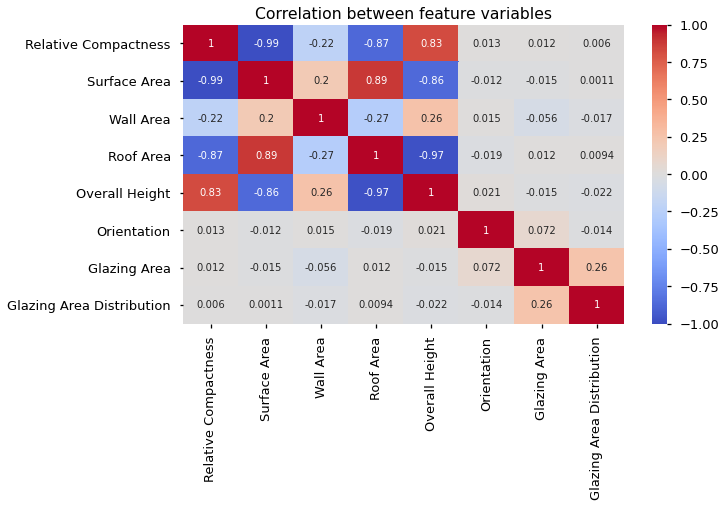

In [6]:
sns.heatmap(dftrain.drop('Heating Load',axis=1).corr(),vmin=-1,cmap='coolwarm',annot=True)
plt.title('Correlation between feature variables')
plt.tight_layout()
plt.savefig('figures\\heatmap.png')
plt.show()

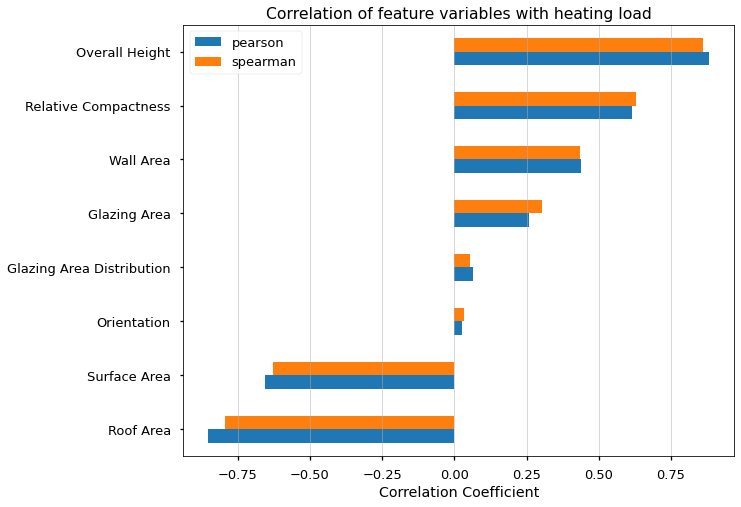

In [7]:
df_corr_pearson = dftrain.corr(method='pearson')['Heating Load'].iloc[:-1].rename('pearson')
df_corr_spearman = dftrain.corr(method='spearman')['Heating Load'].iloc[:-1].rename('spearman')
df_corr = pd.concat([df_corr_pearson,df_corr_spearman],axis=1).sort_values(by='pearson')
df_corr.plot.barh()
plt.xlabel('Correlation Coefficient')
plt.title('Correlation of feature variables with heating load')
plt.tight_layout()
plt.grid(axis='x',linewidth=0.5)
plt.savefig('figures\\corrbars.png')
plt.show()

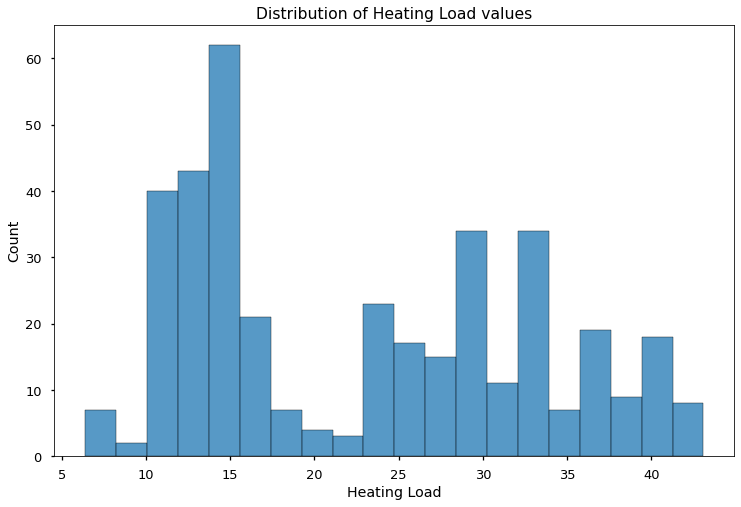

In [8]:
sns.histplot(dftrain['Heating Load'],bins=20)
plt.title('Distribution of Heating Load values')
plt.tight_layout()
plt.savefig('figures\\yhist.png')
plt.show()

In [9]:
dftrain['Heating Load'].describe()

count    384.000000
mean      22.920703
std       10.066099
min        6.400000
25%       14.057500
50%       23.605000
75%       32.052500
max       43.100000
Name: Heating Load, dtype: float64

In [10]:
dftrain['Heating Load'].median()

23.605

In [11]:
#sns.pairplot(dftrain)

In [12]:
# standardise data
scaler = StandardScaler()
X_train = dftrain.drop('Heating Load',axis=1)
y_train = dftrain['Heating Load']
X_test = dftest.drop('Heating Load',axis=1)
y_test = dftest['Heating Load']
X_train_std = pd.DataFrame(scaler.fit_transform(X_train),columns=X_test.columns)
X_test_std = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [13]:
import statsmodels.api as sm
X_train_std['bias']=1
est = sm.OLS(y_train, X_train_std).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heating Load   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     544.8
Date:                Mon, 17 May 2021   Prob (F-statistic):          1.72e-192
Time:                        19:50:52   Log-Likelihood:                -968.22
No. Observations:                 384   AIC:                             1952.
Df Residuals:                     376   BIC:                             1984.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Relative Compactness         -7.2346      1.654     -4.373      0.000     -10.488      -3.982
Surface Area                 -3.9422      1.206     -3.269      0.001      -6.314      -1.571
Wall Area                     0.7560      0.312      2.420      0.016       0.142       1.370
Roof Area                    -4.2319      1.091     -3.880      0.000      -6.376      -2.087
Overall Height                7.2040      0.858      8.401      0.000       5.518       8.890
Orientation                  -0.1252      0.156     -0.803      0.423      -0.432       0.182
Glazing Area                  2.7702      0.162     17.129      0.000       2.452       3.088
Glazing Area Distribution     0.2041      0.161      1.267      0.206      -0.113       0.521
bias                         22.9207      0.155    147.581      0.000      22.615      23.226
==============================================================================
Omnibus:                        7.903   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               11.852
Skew:                           0.109   Prob(JB):                      0.00267
Kurtosis:                       3.832   Cond. No.                     1.81e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.32e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [14]:
results_as_html = est.summary().tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0].to_csv('figures\\regressionsummary.csv')

<AxesSubplot:>

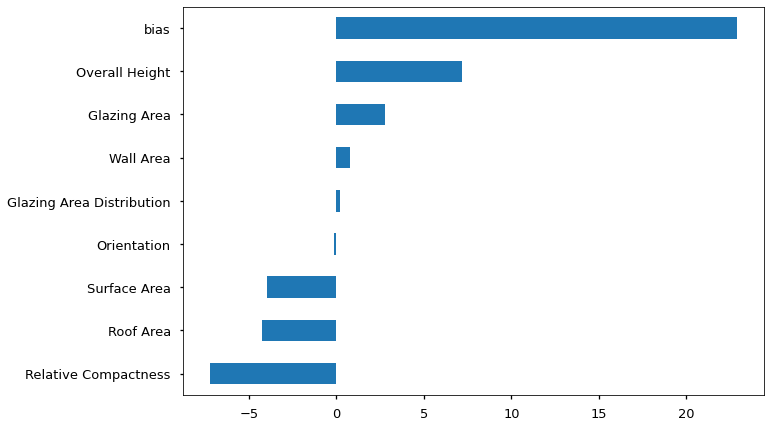

In [15]:
est.params.sort_values().plot.barh()

In [16]:
ols = LinearRegression(fit_intercept=False)
ols.fit(X_train_std,y_train)
reg_coef = pd.DataFrame(ols.coef_,index=X_train_std.columns,columns=['coef'])
r2_all_vars = ols.score(X_train_std,y_train)
print(f'R2 score for training fit = {r2_all_vars}')

R2 score for training fit = 0.9102590385149811


In [17]:
X_test_std.shape

(384, 8)

In [18]:
X_test_std['bias']=1
r2_all_vars_test = ols.score(X_test_std,y_test)
print(f'R2 score for test fit = {r2_all_vars_test}')

R2 score for test fit = 0.9203693406618366


In [19]:
v = {}
for col in X_train.columns:
    x = X_train_std.drop(col,axis=1)
    s = ols.fit(x,y_train).score(x,y_train)
    v[col] = r2_all_vars - s
r2_increase = pd.DataFrame(v.values(),index=v.keys(),columns=['r2_increase'])

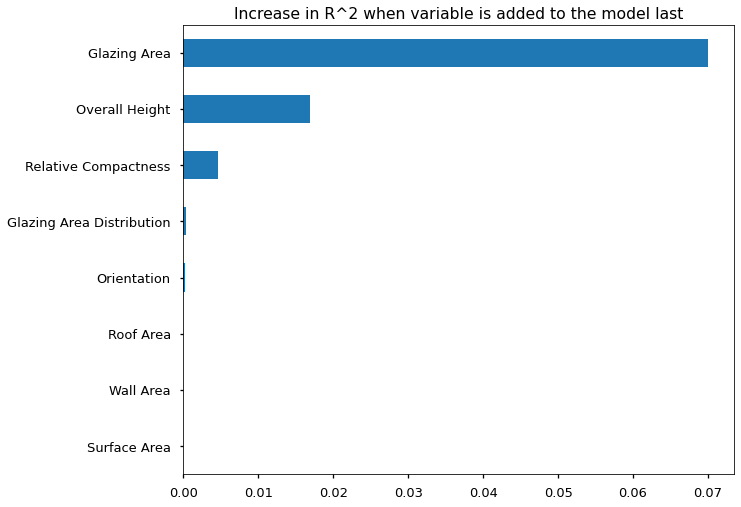

In [20]:
r2_increase.sort_values(by='r2_increase').plot.barh()
plt.title('Increase in R^2 when variable is added to the model last')
plt.gca().get_legend().remove()
plt.tight_layout()
plt.savefig('figures\\r2last.png')

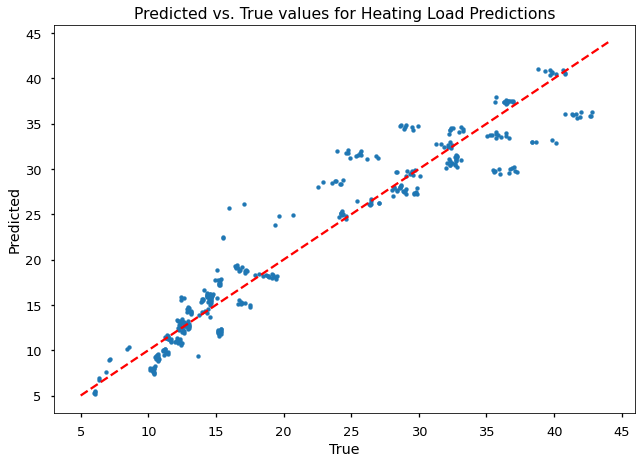

In [21]:
y_test_pred = ols.fit(X_train_std,y_train).predict(X_test_std)
plt.scatter(x=y_test,y=y_test_pred,s=15)
plt.plot(range(5,45),range(5,45),'r--')
plt.ylabel('Predicted')
plt.xlabel('True')
plt.title('Predicted vs. True values for Heating Load Predictions')
plt.savefig('figures\\predictedvstrue.png')

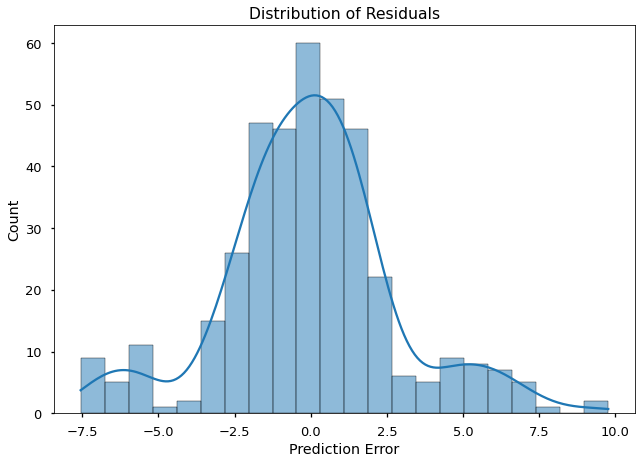

In [22]:
sns.histplot(y_test_pred-y_test,kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Residuals')
plt.savefig('figures\\resdist.png')

In [23]:
print(f'RMSE for training data = {np.sqrt(mean_squared_error(ols.predict(X_train_std),y_train)):.02f}')

RMSE for training data = 3.01


In [24]:
y_test_pred = ols.predict(X_test_std)
print(f'RMSE for test data = {np.sqrt(mean_squared_error(y_test_pred,y_test)):.02f}')

RMSE for test data = 2.84


# Task 2a - Bayesian Linear Regression, Type II ML

In [25]:
X = X_train_std
X_test = X_test_std

In [26]:
def compute_posterior(PHI, y, alph, s2):
    M = PHI.shape[1]
    beta = 1/s2
    H = beta*(PHI.T @ PHI) + alph*np.eye(M)
    SIGMA = np.linalg.inv(H)
    Mu = beta * (SIGMA @ (PHI.T @ y))
    return Mu, SIGMA


In [27]:
from scipy import stats
def compute_log_marginal_scipy(PHI, y, alph, s2):

    N, M = PHI.shape
    C = s2 * np.eye(N) + (PHI @ PHI.T) / alph
    lgp = stats.multivariate_normal.logpdf(y.T, mean=None, cov=C, allow_singular=True)

    return lgp

In [28]:
# taking a uniform prior 
alpha_dims = 50
s2_dims = 50
log_alpha = np.linspace(-10,5,alpha_dims)
log_s2 = np.linspace(-10,10,s2_dims)
log_prob_y = np.zeros([alpha_dims,s2_dims])

for n,l_a in enumerate(tqdm.tqdm(log_alpha)):
    alpha = np.exp(l_a)
    for m,l_s2 in enumerate(log_s2):
        s2 = np.exp(l_s2)
        log_prob_y[n,m] = compute_log_marginal_scipy(X,y_train,alpha,s2)
        
max_prob = log_prob_y.max()
arg_alpha, arg_s2 = np.unravel_index(np.argmax(log_prob_y), log_prob_y.shape)
best_log_alpha = log_alpha[arg_alpha]
best_log_s2 = log_s2[arg_s2]
print(f'best log alpha = {best_log_alpha}\t best alpha = {np.exp(best_log_alpha)}\nbest log s^2 = {best_log_s2}\tbest s^2 = {np.exp(best_log_s2)}\nmax log marginal likelihood = {max_prob}')

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:51<00:00,  1.02s/it]

best log alpha = -5.1020408163265305	 best alpha = 0.006084316913218737
best log s^2 = -10.0	best s^2 = 4.5399929762484854e-05
max log marginal likelihood = -50.16791228282154


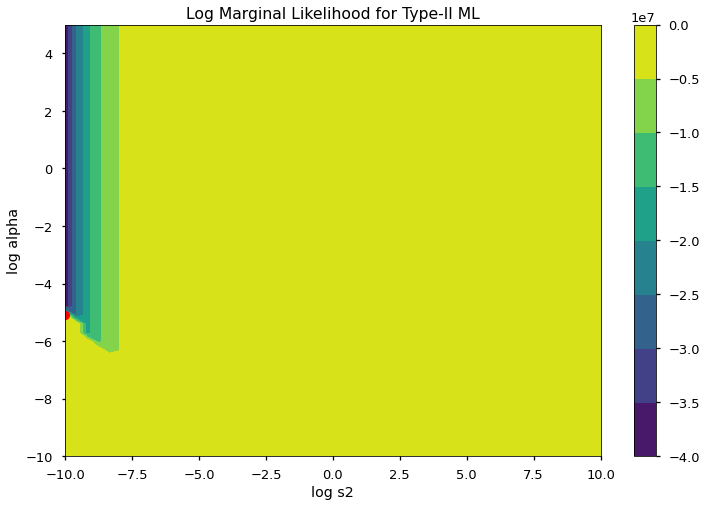

In [29]:
plt.contourf(log_s2,log_alpha,log_prob_y)
plt.plot(best_log_s2,best_log_alpha,'ro')
plt.colorbar()
plt.xlabel('log s2')
plt.ylabel('log alpha')
plt.title('Log Marginal Likelihood for Type-II ML')
plt.tight_layout()
plt.savefig('figures\ex2alog.png')
plt.show()

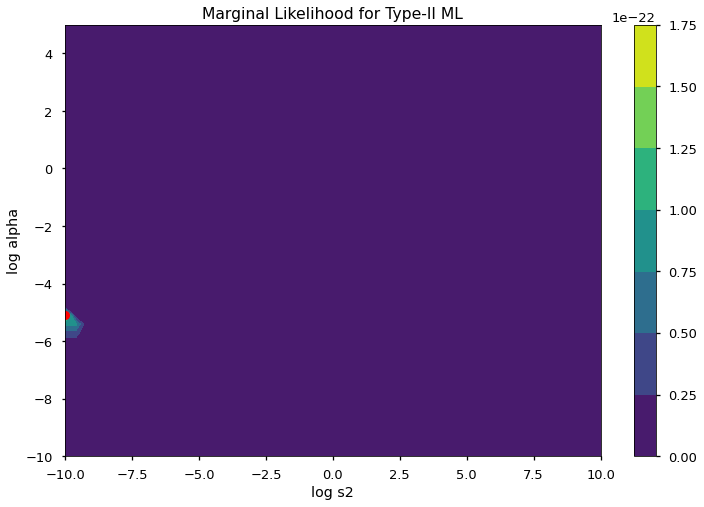

In [30]:
plt.contourf(log_s2,log_alpha,np.exp(log_prob_y))
plt.colorbar()
plt.xlabel('log s2')
plt.ylabel('log alpha')
plt.plot(best_log_s2,best_log_alpha,'ro')
plt.title('Marginal Likelihood for Type-II ML')
plt.tight_layout()
plt.savefig('figures\ex2anonlog.png')
plt.show()

In [31]:
weightstype2,_ = compute_posterior(X, y_train, np.exp(best_log_alpha), np.exp(best_log_s2))
y_train_pred_2 = np.dot(X,weightstype2)

In [32]:
print(mean_squared_error(y_train,y_train_pred_2,squared=False))

3.0115517876503666


In [33]:
print(mean_squared_error(y_test,np.dot(X_test,weightstype2),squared=False))

2.843588018028435


# Task 2b/c - Bayesian Linear Regression, Variational Inference

In [34]:
def calc_terms(a_alpha_n,b_alpha_n,X,y): 
    A_bar = a_alpha_n/b_alpha_n * np.eye(X.shape[1])
    V_n = np.linalg.inv(A_bar + X.T @ X)
    w_n = V_n @ (X.T @ y)
    return w_n, V_n, A_bar

def update_alpha(a_alpha_0,b_alpha_0,a_lambda_n,b_lambda_n,w_n,V_n,X):
    a_alpha_n = a_alpha_0 + X.shape[1]/2
    b_alpha_n = b_alpha_0 + 0.5*(a_lambda_n/b_lambda_n * np.dot(w_n,w_n) + np.trace(V_n))
    return a_alpha_n, b_alpha_n

def update_w_lamda(a_lambda_n,b_lambda_n,w_n,A_bar,X,y):
    a_lambda_n = a_lambda_0 + X.shape[0]/2
    b_lambda_n = b_lambda_0 + 0.5*(np.linalg.norm(y-X@w_n)**2 + w_n.T@A_bar@w_n)
    return a_lambda_n, b_lambda_n

def calc_rmses(w_n):
    y_train_pred = np.dot(X,w_n)
    y_test_pred = np.dot(X_test,w_n)
    rmse_train = mean_squared_error(y_train,np.dot(X,w_n),squared=False)
    rmse_test = mean_squared_error(y_test,np.dot(X_test,w_n),squared=False)
    return rmse_train, rmse_test

In [35]:
a_alpha_0 = 1e-4
b_alpha_0 = 1e-4

a_alpha_n = a_alpha_0
b_alpha_n = b_alpha_0

a_lambda_0 = 1e-4
b_lambda_0 = 1e-4

a_lambda_n = a_lambda_0
b_lambda_n = b_lambda_0


a_alpha = [a_alpha_0]
b_alpha = [b_alpha_0]
a_lambda = [a_lambda_n]
b_lambda = [b_lambda_n]

w = []

for i in range(len(X)):
    sample_x = X[:i+1].to_numpy()
    sample_y = y_train[:i+1].to_numpy()
    
    w_n, V_n, A_bar = calc_terms(a_alpha_n,b_alpha_n,sample_x,sample_y)
    a_lambda_n, b_lambda_n = update_w_lamda(a_lambda_n,b_lambda_n,w_n,A_bar,sample_x,sample_y)
    a_alpha_n, b_alpha_n = update_alpha(a_alpha_0,b_alpha_0,a_lambda_n,b_lambda_n,w_n,V_n,sample_x)
    
    a_alpha.append(a_alpha_n)
    b_alpha.append(b_alpha_n)
    a_lambda.append(a_lambda_n)
    b_lambda.append(b_lambda_n)
    w.append(w_n)
    

In [36]:
alpha = []
s2 = []
rmse_train = []
rmse_test = []

for a_a, b_a, a_l, b_l, w_n in zip(a_alpha,b_alpha,a_lambda,b_lambda,w):
    
    #calculate hyperparameters
    alpha.append(a_a/b_a)
    s2.append(b_l/a_l)
    
    #calculate errors
    err_train, err_test = calc_rmses(w_n)
    rmse_train.append(err_train)
    rmse_test.append(err_test)
    
print(f'final alpha = {alpha[-1]:.04f}\nfinal s2 = {s2[-1]:.04f}\nfinal train error = {rmse_train[-1]:.04f}\nfinal test error = {rmse_test[-1]:.04f}')

final alpha = 0.1107
final s2 = 9.2817
final train error = 3.0117
final test error = 2.8434


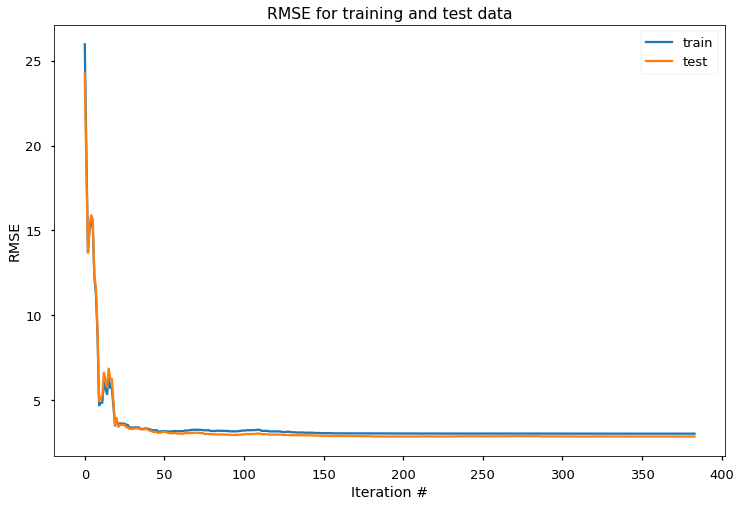

In [37]:
plt.plot(rmse_train,label='train')
plt.plot(rmse_test,label='test')
plt.legend()
plt.xlabel('Iteration #')
plt.ylabel('RMSE')
plt.title('RMSE for training and test data')
plt.tight_layout()
plt.savefig('figures\\varinferr.png')
plt.show()

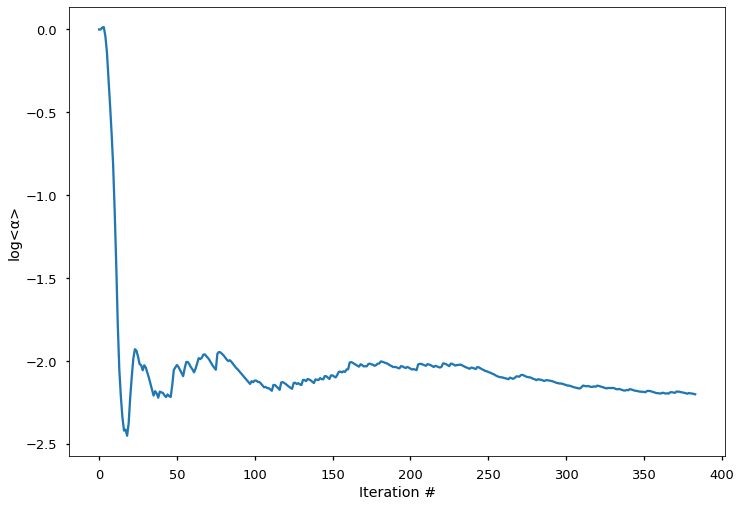

In [38]:
plt.plot(list(map(lambda x:np.log(x),alpha)))
plt.xlabel('Iteration #')
plt.ylabel('log<α>')
plt.tight_layout()
plt.savefig('figures\\varalpha.png')
plt.show()

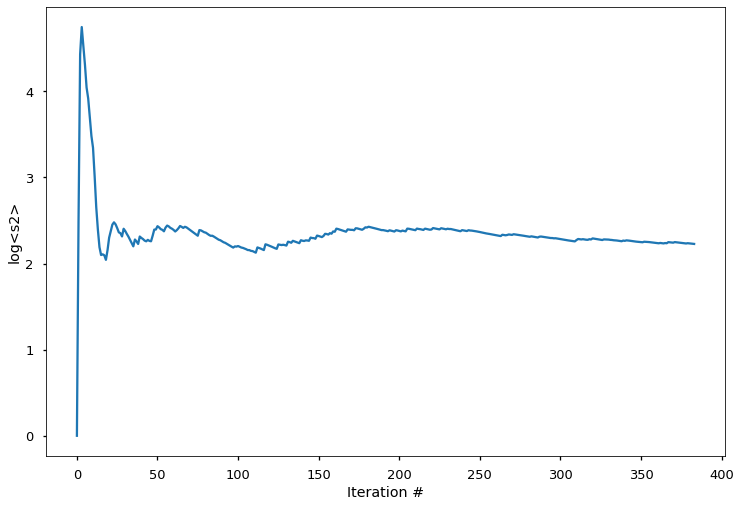

In [39]:
plt.plot(list(map(lambda x:np.log(x),s2)))
plt.xlabel('Iteration #')
plt.ylabel('log<s2>')
plt.tight_layout()
plt.savefig('figures\\vars2.png')
plt.show()

# Task 3 - Hamiltonian MC on 2D Gaussian

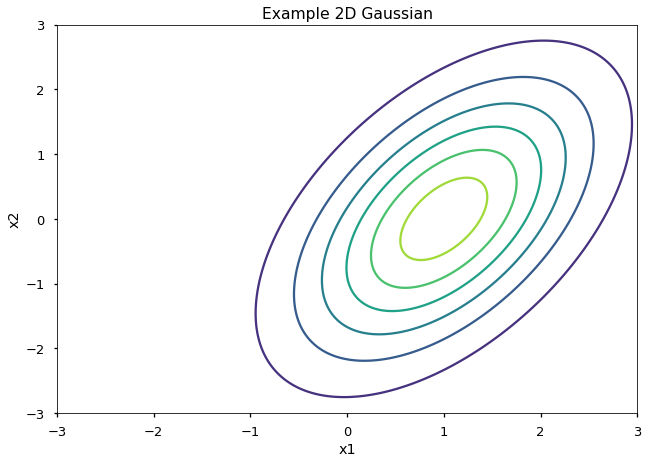

In [40]:
mu = np.array([1,0])
cov = np.array([[1,0.75],[0.75,2]])

x1=np.linspace(-3,3,500)
x2=np.linspace(-3,3,500)
x1,x2=np.meshgrid(x1,x2)
joint=np.array([x1,x2]).T

p=stats.multivariate_normal.pdf(joint,mu,cov)
plt.contour(x2,x1,p)
plt.title("Example 2D Gaussian")
plt.xlabel("x1")
plt.ylabel("x2")
plt.savefig('figures\\gausstest.png')
plt.show()

In [41]:
def e_func(x):
    return -multivariate_normal.logpdf(x,mean=mu,cov=cov)

def e_grad(x):
    mu = np.array([1,0])
    cov = np.array([[1,0.75],[0.75,2]])
    m1 = mu[0]
    m2 = mu[1]
    v1 = cov[0,0]
    v2 = cov[1,1]
    s1 = np.sqrt(v1)
    s2 = np.sqrt(v2)
    rho = cov[0,1]/(s1*s2)
    
    g = np.empty(2)
    
    g[0] = 2 / v1 * (x[0]-m1) - 2*rho*(x[1]-m2)/(s1*s2)
    g[1] = 2 / v2 * (x[1]-m2) - 2*rho*(x[0]-m1)/(s1*s2)
    
    g = g / (2*(1-rho**2))
    return g

Calc.         Numeric       Delta         Acc.
    -4.53552      -4.53552  -1.306600e-09  10
     2.48434       2.48434  -1.274123e-09  10
|----------|  0% accepted [ 4 secs to go ]
|#---------| 89% accepted [ 3 secs to go ]
|##--------| 90% accepted [ 3 secs to go ]
|###-------| 91% accepted [ 4 secs to go ]
|####------| 91% accepted [ 3 secs to go ]
|#####-----| 91% accepted [ 3 secs to go ]
|######----| 91% accepted [ 2 secs to go ]
|#######---| 91% accepted [ 2 secs to go ]
|########--| 91% accepted [ 1 secs to go ]
|#########-| 91% accepted [ 1 secs to go ]
|##########| 91% accepted [ 0 secs to go ]
HMC: R=5000 / L=20 / eps=0.9 / Accept=90.8%


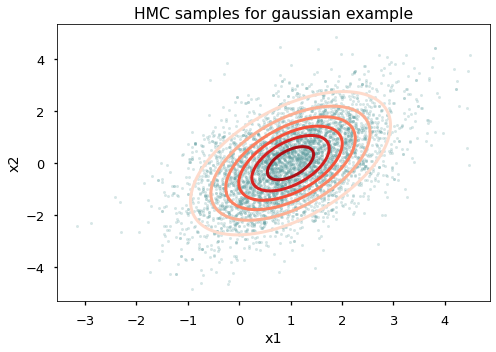

In [42]:
#
import lab4_hmc as hmc
x0 = np.random.normal(size=2)
np.random.seed(seed=1)  # For reproducibility
R = 5000  # More than really needed, but produces a nice dense plot
burn = int(R/10)  # A reasonable rule-of-thumb
L = 20  # OK here (should be larger in regression sampling)
eps = 0.9 # Trial-and-error ... feel free to experiment!
#
S, *_ = hmc.sample(x0, e_func, e_grad, R, L, eps, burn=burn, checkgrad=True)
plt.figure(figsize=[7,5])
plt.plot(S[:, 0], S[:, 1], '.', ms=6, color='CadetBlue', alpha=0.25, zorder=0)
plt.contour(x2,x1,p, cmap='Reds', linewidths=3, zorder=1);
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('HMC samples for gaussian example')
plt.tight_layout()
plt.savefig('figures\\hmc2dgauss.png')

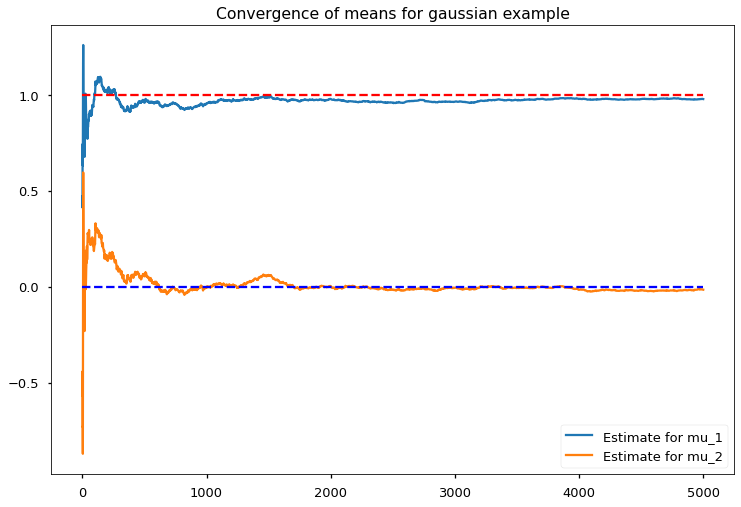

In [43]:
S_mean = np.cumsum(S,axis=0)/(np.array(range(len(S)))+1).reshape(-1,1)
plt.plot(S_mean[:,0],label='Estimate for mu_1')
plt.plot(S_mean[:,1],label='Estimate for mu_2')
plt.plot([0,5000],[1,1],'r--')
plt.plot([0,5000],[0,0],'b--')
plt.legend(loc='lower right')
plt.title('Convergence of means for gaussian example')
plt.tight_layout()
plt.savefig('figures\\hmc2dgaussmeans.png')

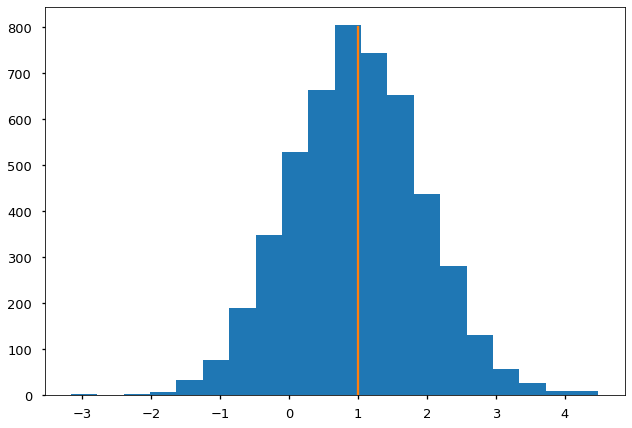

In [44]:
plt.hist(S[:,0],bins=20)
plt.plot([1,1],[0,800])
plt.show()

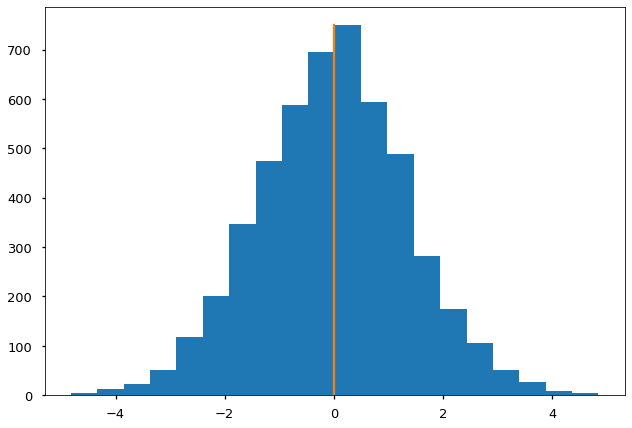

In [45]:
plt.hist(S[:,1],bins=20)
plt.plot([0,0],[0,750])
plt.show()

# Task 4 - Hamiltonian MC on Posterior

In [46]:
def e_func(x0,f):
    x = f[0]
    y = f[1]
    
    alpha = x0[0]
    s2 = x0[1]
    w = np.array(x0[2:])
    
    M = x.shape[1]
    N = x.shape[0]
    
    a = -(N/2 * np.log(s2)) - (1/(2*s2) * np.sum((y-x@w)**2))
    b = (M/2 * np.log(alpha)) - ((alpha/2) * np.sum(w**2))
    
    return -(a+b)

def e_grad(x0,f):
    x = f[0]
    y = f[1]
    
    alpha = x0[0]
    s2 = x0[1]
    w = np.array(x0[2:])
    
    M = x.shape[1]
    N = x.shape[0]
    
    grad_alpha = -M/(2*alpha) + np.sum(w**2)/2
    grad_s2 = N/(2*s2) - 1/(2*s2**2) * np.sum((y-x@w)**2)
    grad_w = alpha*w + 1/(2*s2) * 2*(y-x@w)@-x
    
    return np.array([grad_alpha,grad_s2] + grad_w.to_list())



    

In [47]:
R = 5000
burn = int(R/10) 
L = 100  
eps = 0.0035
#
f = [X,y_train]
S, *_ = hmc.sample(np.array([alpha[-1],s2[-1]] + list(w_n)), e_func, e_grad, R, L, eps, burn=burn, checkgrad=True,args=[f])

Calc.         Numeric       Delta         Acc.
     291.838       291.838  -3.918035e-08  10
    0.471039      0.471039  -1.713986e-08   8
   -0.684419     -0.684419  -1.165345e-08   8
   -0.368625     -0.368625  -3.811291e-08   7
   0.0795306     0.0795305  -7.061657e-08   7
   -0.399885     -0.399885   2.802247e-08   8
     0.72087      0.720869  -5.892568e-08   8
  -0.0124553    -0.0124552   3.993923e-08   6
    0.273811      0.273811  -1.550239e-08   8
   0.0200329     0.0200329   2.122730e-08   6
     2.26405       2.26405   4.049438e-09   9


<ipython-input-46-32cc10e73757>:13: RuntimeWarning: invalid value encountered in log
  b = (M/2 * np.log(alpha)) - ((alpha/2) * np.sum(w**2))


KeyboardInterrupt: 

In [ ]:
S_mean = np.cumsum(S,axis=0)/(np.array(range(len(S)))+1).reshape(-1,1)
plt.plot(S_mean[:,0])
plt.title('alpha')
plt.show()
alpha = S_mean[-1,0]
print(f'final alpha = {alpha}')

In [ ]:
plt.plot(S_mean[:,1])
plt.title('s2')
print(f'final s2 = {S_mean[-1,1]}')

In [ ]:
plt.plot(S_mean[:,-1])
plt.title('bias')
print(f'final bias = {S_mean[-1,-1]}')

In [ ]:
best_w = S_mean[-1,2:]
err_train, err_test = calc_rmses(best_w)

In [ ]:
print(f'final train error = {err_train:.04f}\nfinal test error = {err_test:.04f}')

# Task 5 - Hamiltonian MC for Classification

In [48]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
y_binary = np.where(y_train>23,1,0)

def e_func(x0,f):
    x = f[0]
    y = f[1]
    
    alpha = x0[0]
    w = np.array(x0[1:])
    
    M = x.shape[1]
    N = x.shape[0]
    
    a = np.sum(np.log(sigmoid(w@x.T)) * y + (1-y)*np.log(1-sigmoid(w@x.T)))
    b = (M/2 * np.log(alpha)) - ((alpha/2) * np.sum(w**2))
    
    return -(a+b)


def e_grad(x0,f):
    x = f[0]
    y = f[1]
    
    alpha = x0[0]
    w = np.array(x0[1:])
    
    M = x.shape[1]
    N = x.shape[0]
    
    grad_alpha = -M/(2*alpha) + np.sum(w**2)/2
    grad_w = alpha*w - (y-sigmoid(w@x.T))@x
    
    return np.array([grad_alpha] + grad_w.to_list())

In [49]:
R = 1000
burn = int(R/10) 
L = 25
eps = 0.03
f = [X,y_binary]
S, *_ = hmc.sample(np.array([0.01]+[0]*9), e_func, e_grad, R, L, eps, burn=burn, checkgrad=True,args=[f])

Calc.         Numeric       Delta         Acc.
        -450          -450  -1.507078e-06   9
     -146.86       -146.86   2.853221e-08  10
     153.219       153.219  -5.646427e-09  11
    -53.1448      -53.1448  -3.204677e-08  10
     175.673       175.673   1.865561e-08  10
    -180.334      -180.334   2.087830e-09  11
      -7.231        -7.231  -1.889050e-08   9
    -16.1591      -16.1591   7.637471e-09  10
    -11.4549      -11.4549   2.767755e-08   9
          -2            -2   5.049515e-09   9


<ipython-input-48-4510a7b68a03>:15: RuntimeWarning: invalid value encountered in log
  b = (M/2 * np.log(alpha)) - ((alpha/2) * np.sum(w**2))
C:\Users\theod\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


|----------|  0% accepted [ 40 secs to go ]


C:\Users\theod\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


|#---------| 63% accepted [ 37 secs to go ]
|##--------| 71% accepted [ 31 secs to go ]
|###-------| 76% accepted [ 28 secs to go ]
|####------| 72% accepted [ 24 secs to go ]
|#####-----| 77% accepted [ 19 secs to go ]
|######----| 79% accepted [ 16 secs to go ]
|#######---| 80% accepted [ 12 secs to go ]
|########--| 79% accepted [ 8 secs to go ]
|#########-| 80% accepted [ 4 secs to go ]
|##########| 81% accepted [ 0 secs to go ]
HMC: R=1000 / L=25 / eps=0.03 / Accept=80.6%


In [50]:
S_mean = np.cumsum(S,axis=0)/(np.array(range(len(S)))+1).reshape(-1,1)
w_cl = S_mean[-1,1:]

In [51]:
y_test_pred = np.where(sigmoid(np.dot(w_cl,X_test.T))>0.5,1,0)
y_test_bin = np.where(y_test>23,1,0)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_pred,y_test_bin)

0.9895833333333334